# Final Project
## Udacity Introduction to Data Analysis
## (Project 2 of the Data Analyst Nanodegree)
## *by Jeff Hartl*

### Question: What factors, or combination of factors, made people more likely to survive the sinking of the Titanic?

In [117]:
# Settings and imported modules
%pylab inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [118]:
# Load data from the Titanic CSV file into a Pandas DataFrame
df = pd.read_csv('titanic_data.csv')

In [119]:
# Take an overview look at the new dataframe
print(df.columns)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Since I'm exploring the likelihood of survival, I don't want to look just at the raw values in the 
"Survived" column. I'd like to calculate the *proportion* that survived among all passengers in the 
sample. How could I do this? Well, since a 1 in the "Survived" column indicates the passenger survived, summing up the 1's would
give me the number of survivors; and, dividing the survival sum by the count of all rows in the column (the length
of the "Survived" column) will calculate the proportion who survived.

The proportion can be calculated over the DataFrame as a whole, or by a specific value or set of values
within a column or over multiple columns. This flexibility will allow me to filter the data by certain
conditions and then calculate the survival proportion for the filtered rows.

In [120]:
# Overall survival
total_surv_propn = (df.sum()/df.count())['Survived']

# Survival proportion for a single column -- 
# Sex, for example, since it only has two possible values
fem_surv_propn = \
    df[df.Sex=='female']['Survived'].astype(float).sum() / df[df.Sex=='female']['Survived'].count()

print('Among all passengers, the proportion that survived was {}'.format(total_surv_propn))
print('Among female passengers, the proportion that survived was {}'.format(fem_surv_propn))

Among all passengers, the proportion that survived was 0.3838383838383838
Among female passengers, the proportion that survived was 0.7420382165605095


  
In looking for factors that affected survival rates, there are several columns of data that could be chosen. This project will explore three columns of particular interest: "Sex", "Pclass", and "Age". Why I chose these three will become apparent as I wrangle and explore each of them, in turn.

I will explore these variables individually as they relate to survival, first. And then I will explore two or more of the variables together in order to analyze their combined effect on survival.

_Dependent Variable_: __Survived__

_Independent Variables_: __Sex, Pclass, Age__

But first, since the code was lengthy that I just wrote for calculating the survival proportion, and it will be called upon multiple times throughout the project, I will put it in function form.

In [121]:
# Functions: Calculate the proportion of survivors

def conditional_survival(data):
    '''
    data: a dataframe, filtered by conditions;
          can be whole column if column values 
          are expressed as a condition -- e.g., 
          df[df.Age>0] or df[df.Cabin.notnull()]
    Returns: <float> proportion that survived
    Usage examples: 
      conditional_survival(df[(df.Sex == 'female')])
      conditional_survival(df[(df.Age <= '12') & (df.Pclass == 1)])
    '''
    return (data.sum()/data.count())['Survived']


def survival_group(data, col):
    '''
    data: a dataframe
    col:  which column(s) to group the data by; 
          to group by more than 1 column, this arg should be a list
    Returns: <float> proportion survived per group or subgroup
    Usage example:
        survival_group(df, 'Pclass')
    '''
    return data.groupby(col)['Survived'].sum()/data.groupby(col)['Survived'].count()

****

## Exploring the Factors

### Variable: Sex

In [122]:
# Any missing data in the Sex column?
print(df['Sex'].hasnans)

False


In [123]:
# Passengers by Sex
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

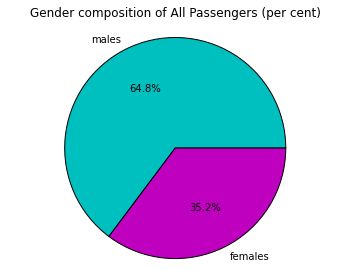

In [124]:
# Pie chart percentage of passengers by Sex

# input data
x = df['Sex'].value_counts()

# plot
plt.pie(x, colors=['c', 'm'], labels=['males', 'females'], autopct='%1.1f%%')
plt.axis('equal')  # prevent pie from looking tilted
plt.title('Gender composition of All Passengers (per cent)\n')
plt.show()

Number of survivors by sex
female    233
male      109
Name: Sex, dtype: int64 

Proportion of survivors, female: 0.681
Proportion of survivors, male:   0.319



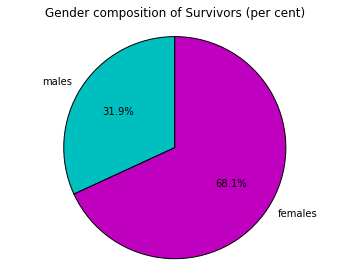

In [125]:
# Number of survivors
survivors = df[df.Survived==1]
# Survivors by sex
print('Number of survivors by sex')
print(survivors['Sex'].value_counts(), '\n')
f_surv = survivors[survivors['Sex']=='female'].count()['PassengerId'].astype(float) / len(survivors)
print('Proportion of survivors, female: %.3f' % f_surv)
m_surv = survivors[survivors['Sex']=='male'].count()['PassengerId'].astype(float) / len(survivors)
print('Proportion of survivors, male:   %.3f\n' % m_surv)
# Plot survival proportions by sex
s = pd.Series([m_surv, f_surv]) #, name = 'Survivors by Sex')
#sbsex.plot(kind='pie', autopct='%.1f', fontsize=13, figsize=(5, 5), 
#                                 labels=['female % of survivors', 'male % of survivors'], 
#                                 colors=['m', 'c'])
#show()
plt.pie(s, colors=['c','m'], labels=['males','females'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Gender composition of Survivors (per cent)\n')
plt.show()

The gender composition of the survivors group is slightly different than the likelihood of survival among all.

In [126]:
# Proportion who survived, by sex

# Female survival proportions
fs_propn = conditional_survival(df[df.Sex=='female'])  
seriesF = pd.Series([fs_propn, 1 - fs_propn], index=['Survived', 'Perished'], name='Females')

# Male survival proportions
ms_propn = conditional_survival(df[df.Sex=='male'])  
seriesM = pd.Series([ms_propn, 1 - ms_propn], index=['Survived', 'Perished'], name='Males')

# Combine F and M survival series into single DataFrame
surv_by_sex = pd.DataFrame([seriesF, seriesM])
surv_by_sex

,Survived,Perished
Females,0.742038,0.257962
Males,0.188908,0.811092


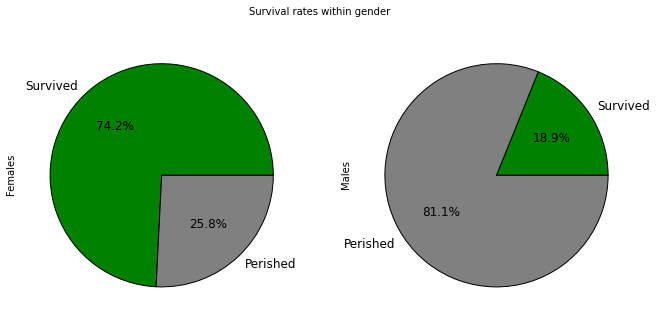

In [127]:
# Pie charts of female survival and male survival.
surv_by_sex.T.plot.pie(subplots=True, autopct='%1.1f%%', colors=['green','gray'], legend=False, 
                       title='Survival rates within gender', fontsize=12, figsize=(11,5))
show()

__*Tentative Conclusions: Sex*__

Sex was a strong factor in the likelihood of surviving. About three-quarters of females survived, while less than one-in-five males survived. All else being equal, females had a 74% chance of surviving, and males had a 19% chance of surviving.

Females were approximately 35%, and males 65%, of all passengers in the entire sample. But among those who survived, approximately 68% were female, 32% male. The percentages are nearly reversed. Sex appears to be a notable feature of survivors.

### Variable: Passenger Class ("Pclass")

In [128]:
# Any missing data?
print(df['Pclass'].hasnans)

False


In [129]:
# Number of passengers per Pclass
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [130]:
# Number who survived per Pclass
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [131]:
# Proportion of survivors in each Pclass
pclass_surv = pd.DataFrame(survival_group(df, 'Pclass'))
pclass_surv

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


So, in this sample, the percentage who survived per Pclass is:

1st Class: 62.9%<br>
2nd Class: 47.3%<br>
3rd Class: 24.2%

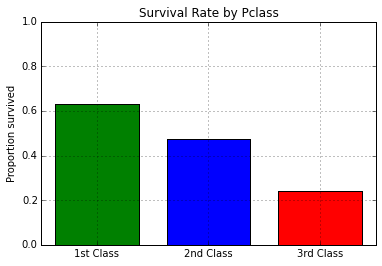

In [132]:
# List of survival proportion for each pclass
pclass_values = [c[0] for c in pclass_surv.values]

# Plot
# set up bars and grid
pclass_labels = ['1st Class', '2nd Class', '3rd Class']  # bar labels
x_pos = list(range(3))  # x position of bars
plt.bar(x_pos, pclass_values, width=3/4, align='center', color=['green','blue','red'])
plt.grid()
plt.ylim(0.0, 1.0)  # set y-axis limits

# set axes labels and title
plt.ylabel('Proportion survived')
plt.xticks(x_pos, pclass_labels)
plt.title('Survival Rate by Pclass')

plt.show()

__*Tentative Conclusions: Pclass*__

Survival rates appear to be related to passenger class. 1st Class passengers had a better than 0.5 likelihood of survival -- about 5 out of 8 survived. Just under half of the 2nd Class passengers survived. Only about 1-in-4 3rd class passengers survived.

The higher the passenger class, the greater the proportion of survivors within that class.

### Variable: Age

Age statistics  

In [133]:
# Descriptive statistics for the "Age" column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

What were the most common ages of passengers?

In [134]:
print(df['Age'].mode())
print(df.Age.value_counts().iloc[:10])

0    24
dtype: float64
24    30
22    27
18    26
19    25
28    25
30    25
21    24
25    23
36    22
29    20
Name: Age, dtype: int64


The sample's mean age is under 30. The median age is 28. Half of the passengers were between ages 20 and 38. The most common age is 24, and the top ten most common ages lie between 18 and 36.

A much larger number of the Titanic's passengers were young adults than I would have presumed.


In [135]:
# Any null values in the Age column?
df.Age.hasnans

True

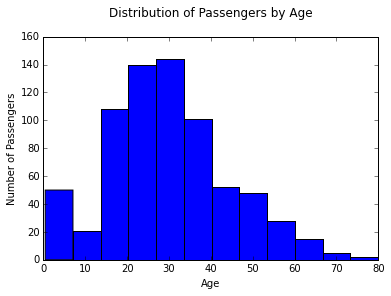

In [136]:
# frequency histogram of ages

# input data
x = df.Age.dropna()

# plot
plt.hist(x, bins=12)

# labels
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers by Age\n')

plt.show()

The distribution of ages is positively skewed. So, the passengers were mostly adults. And, as stated already, the adults most were young adults.  <p>


  
_Question_: At what age does the proportion that survived dip below 0.5?

In [137]:
# Call the ``conditional_survival`` function on a variety of ages below
# the mean until finding which age was the closest to 0.5 survival

age = 18

print(conditional_survival(df[df['Age'] <= age]))
print(conditional_survival(df[df['Age'] > age]))

0.503597122302
0.382608695652


Just over half the passengers under age 18 survived. Above age 18, the proportion who survived was nearly the same as that of all passengers of all ages.

If I were comparing only Age to the likelihood of survival (and no other variables such as Sex or Pclass), then I would use only two age groups, 0-18 and 18+. But, because later on I'm going to look at Age in conjunction with Pclass and Sex, I need to have as many rows with data in the Age column as there are in the other two variables' columns.

Unlike Sex and Pclass, there are values missing from the Age column.  

In [138]:
# How many missing Ages?
# (count on "Name" column because it has no NaNs -- the count will be complete)
df[df['Age'].isnull()==True]['Name'].count()

177

We are missing age values for 177 passengers. That's a lot.

I'd like to fill in the missing ages with some kind of estimated age. I could fill the NaNs with a mean or median age, but since age has a standard deviation of 14.5 years -- half the mean. When I fill in the missing ages, I might want to account for that variability in age in some cases, not always using a singular value such as the mean or median.

I decided to look at the titles by which passengers were addressed as a way of estimating the missing ages. By titles, I mean the prefix of their names -- Mrs., Mr., Miss, Master. I chose this approach after noticing that "Master" was how underage boys were addressed.

In [139]:
# Exploring name prefix relationship to age...

print(df[df['Name'].apply(lambda x: 'Mr.' in x)]['Name'].count(), 'Mr`s')
print('Age stats for "Mr." (lower count due to missing ages)')
print(df[df['Name'].apply(lambda x: 'Mr.' in x)]['Age'].describe(), '\n*********\n')

print(df[df['Name'].apply(lambda x: 'Mrs' in x)]['Name'].count(), 'Mrs`s')
print('Age stats for "Mrs." (lower count due to missing ages)')
print(df[df['Name'].apply(lambda x: 'Mrs.' in x)]['Age'].describe())
# how many "underage" Mrs?
print(df[(df['Name'].apply(lambda x: 'Mrs.' in x)) & (df['Age']<18)]['Name'].count(), 'Mrs under 18\n*********\n')

print(df[df['Name'].apply(lambda x: 'Master' in x)]['Name'].count(), 'Master`s')
print('Age stats for "Master" (lower count due to missing ages)')
print(df[df['Name'].apply(lambda x: 'Master' in x)]['Age'].describe(), '\n*********\n')

print(df[df['Name'].apply(lambda x: 'Miss' in x)]['Name'].count(), 'Miss`s')
print('Age stats for "Miss" (lower count due to missing ages)')
print(df[df['Name'].apply(lambda x: 'Miss' in x)]['Age'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9]))

# Note:
# Two names included both "Miss" and "Mrs" in them and they therefore got double-counted.
# (I discovered this by using FIND in MS Excel).
# But neither passenger had a NaN age, so their ages don't need filling in.

517 Mr`s
Age stats for "Mr." (lower count due to missing ages)
count    398.000000
mean      32.368090
std       12.708793
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64 
*********

129 Mrs`s
Age stats for "Mrs." (lower count due to missing ages)
count    108.000000
mean      35.898148
std       11.433628
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64
4 Mrs under 18
*********

40 Master`s
Age stats for "Master" (lower count due to missing ages)
count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64 
*********

182 Miss`s
Age stats for "Miss" (lower count due to missing ages)
count    146.000000
mean      21.773973
std       12.990292
min        0.750000
10%        4.000000
20%        9.000000
30%       16.0000

Observations:<br>
(from looking over these stats while cross-referencing the CSV data in MS Excel)

>One man's title is not "Mr." but "Dr."; I'll assume he was a Mr.<br>
>There are only 3 Mr's age 14 or under.<br>
>The oldest "Master" is 12.<br>
>There's 1 Mrs. aged 14 and only 4 under age 18 altogether.<br>
>90% of the "Misses" were between ages 4 and 38<br>

For the purpose of filling in missing Age values, I'll use the following guidelines:
>I will assume that if Name contains "Mr." or "Mrs.", its an adult<br>
>If Name contains "Master", he is under age 14. (typically, "Mr."'s were 14 and older)<br>
>If Name contains "Miss", age is between 4 and 38, so a "Miss" could be a child *or* an adult (matters for binning)

In [140]:
# Age stats of all Mr. and Mrs. passengers
df[ df['Name'].str.contains('Mr. ') | df['Name'].str.contains('Mrs. ')]['Age'].mean()

33.087254901960783

In [141]:
# Examples of my exploration of the relationship of passengers Name prefix to their Ages

# the oldest passenger called "Master" was 12, so "Masters" are <= Age 12
print(df[df.Age <= 12]['Age'].describe(), '\n')

# only 1 'Mr' below age 14, so assume passenger is adult if Name contains "Mr."
print(df[df['Name'].apply(lambda x: 'Mr.' in x)]['Age'].describe(percentiles=[.2, .4, .6, .8]))

# there's 1 age 14 & 1 age 15 "Mrs"; all other "Mrs"s are between ages 17 and 63.
df[df['Name'].apply(lambda x: 'Mrs' in x)]['Age'].describe(percentiles=[.2, .4, .6, .8])

count    69.00000
mean      4.77058
std       3.39039
min       0.42000
25%       2.00000
50%       4.00000
75%       8.00000
max      12.00000
Name: Age, dtype: float64 

count    398.000000
mean      32.368090
std       12.708793
min       11.000000
20%       21.000000
40%       27.000000
50%       30.000000
60%       33.000000
80%       42.000000
max       80.000000
Name: Age, dtype: float64


count    112.000000
mean      35.642857
std       11.506251
min       14.000000
20%       24.200000
40%       31.000000
50%       35.000000
60%       39.000000
80%       45.000000
max       63.000000
Name: Age, dtype: float64

In [142]:
# Function for filling in NaN ages according to passenger's title

import random as ran  # import as "ran" because pylab was "clobbering" the as-name "random"

def infer_ages(nom):
    '''nom: <string> Name of passenger
       Return a number for age, depending on how passenger was addressed
    '''
    if 'Master' in nom:
        return 4.6   # mean of Masters' of known ages
    if 'Mr.' in nom or 'Mrs.' in nom or 'Dr.' in nom:
        return 33.1  # mean of Mr's and Mrs' of known ages
    if 'Miss' in nom:
        return ran.randrange(4, 39)  # A "Miss" might be a child or an adult

In [143]:
# Create a new column, "Age_Guess", and fill in ages based on infer_ages function
# Filling in ages only for rows where "Age" is NaN.
df['Age_Guess'] = df[df['Age'].isnull()]['Name'].apply(infer_ages)

In [144]:
# Merge original "Age" column with "Age_Guess" column into a single NaN-less column

# Use a copy of Age, in order to preserve the original 'Age' column
df['Ages_All'] = df['Age']

# Use 'Age_Guess' to fill missing values
df['Ages_All'] = df['Age'].fillna(df['Age_Guess'])

# Dov's way (give attribution\credit) FROM KAGGLE ###
print('Passengers with missing ages filled in:')
print(df[['Age', 'Age_Guess', 'Ages_All', 'Name']][df.Age.isnull()].head())
print('\nPassengers with ages copied to Ages_All:')
print(df[['Age', 'Age_Guess', 'Ages_All', 'Name']][df.Age>0].ix[2:7]) # use ix, not head, so names don't carry over

Passengers with missing ages filled in:
    Age  Age_Guess  Ages_All                           Name
5   NaN       33.1      33.1               Moran, Mr. James
17  NaN       33.1      33.1   Williams, Mr. Charles Eugene
19  NaN       33.1      33.1        Masselmani, Mrs. Fatima
26  NaN       33.1      33.1        Emir, Mr. Farred Chehab
28  NaN        5.0       5.0  O'Dwyer, Miss. Ellen "Nellie"

Passengers with ages copied to Ages_All:
   Age  Age_Guess  Ages_All                                          Name
2   26        NaN        26                        Heikkinen, Miss. Laina
3   35        NaN        35  Futrelle, Mrs. Jacques Heath (Lily May Peel)
4   35        NaN        35                      Allen, Mr. William Henry
6   54        NaN        54                       McCarthy, Mr. Timothy J
7    2        NaN         2                Palsson, Master. Gosta Leonard


In [145]:
df['Ages_All'].hasnans

False

Looking at likelihood of survival for each and every unique age might be overkill. Maybe I can generalize it. I did some reading of tutorials over at Kaggle and saw how some users binned the multiple number of Fare values. Inspired by this, I'd like to bin the ages into age groups. (_see References list at end of report for credits_)

I decided to create three bins for a new "Age Group" column:

>__|__ `"child"` __|__ `"adult"` __|__ `"elder"` __|__

In [146]:
# Bin the age values

# Define bins: under 14, 14 to 59, 59+ (80.1 is edge of last bin because max age is 80)
age_bins = [0.1, 14.0, 59.0, 80.1]  

# Create names for the age groups
age_labels = ['child', 'adult', 'elderly']

# Cut all ages into bins and fill a new column with them
df['Age_Group'] = pd.cut(df['Ages_All'], age_bins, labels=age_labels)

# View the Age_Group column as part of dataframe
df[['PassengerId', 'Sex', 'Ages_All', 'Age_Group']].head(35)

,PassengerId,Sex,Ages_All,Age_Group
0,1,male,22.0,adult
1,2,female,38.0,adult
2,3,female,26.0,adult
3,4,female,35.0,adult
4,5,male,35.0,adult
5,6,male,33.1,adult
6,7,male,54.0,adult
7,8,male,2.0,child
8,9,female,27.0,adult
9,10,female,14.0,child


In [147]:
# Count the number of passengers in each group
pd.value_counts(df['Age_Group'])

adult      773
child       92
elderly     26
dtype: int64

_bin cuts that I experimented with:_<br>
age_bins = [0.0, 14.9, 58.9, 80.9]<br>
age_bins = [0.0, 13.9, 63.9, 80.9]<br>
age_bins = [0.0, 19.9, 55.9, 80.9]<br>
age_bins = [0.0, 14.5, 29.0, 43.5, 59.0, 73.5, 88.0]

By toying with the marginal ages of the adult bin, I was trying to shrink the size of the adult group so that it wasn't so close to the entire frame size. However, but all that did was bring *all three* Age Groups closer to the overall survival rate by *Sex*. And I didn't want the Age variable to simply mirror the Sex variable in relation to survival. So, in the end I went with the age bins as coded above.

Something I observed as I altered the marginal ages of the age bins was that the 'adult' survival rates by sex stuck close to the overall survival rates regardless, and the 'elder' rates did too (though not so closely). However, as I pushed the upper margin of the 'child' bin up (towards "older" ages), the male survival rates dropped dramatically while female rates improved slightly.

I'm going to have to take a closer look at Sex and Age together, and will do so after concluding this Age analysis.

In [148]:
# Proportion that survived per age group
surv_by_agegroup = survival_group(df, 'Age_Group')
surv_by_agegroup

Age_Group
child      0.576087
adult      0.364812
elderly    0.269231
Name: Survived, dtype: float64

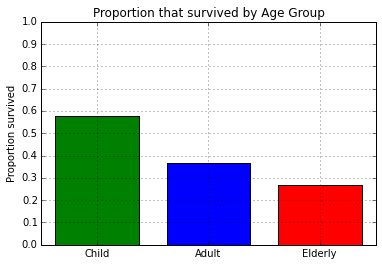

In [149]:
# List of survival proportions for each age group
age_group_values = surv_by_agegroup.values

# Bar labels
age_labels = ['Child', 'Adult', 'Elderly']

# Set up bars and grid
x_pos = list(range(3))  # x position of bars
plt.bar(x_pos, age_group_values, width=.75, align='center', color=['g', 'b', 'r'])
plt.grid()

# set axes labels and title
plt.ylabel('Proportion survived')
plt.xticks(x_pos, age_labels)
plt.yticks(arange(0.0, 1.1, 0.1))
plt.title('Proportion that survived by Age Group')

plt.show()

__*Tentative Conclusions: Age*__

A passenger's age was not a strong factor in the likelihood of surviving _except among the **very young**_.

Children under age 14 were more likely to survive than not. Adults (including teenagers over 14, but not including the elderly) survived at nearly the same rate as all passengers combined. The elderly had a lower survival rate than all passengers combined.

If I'd used a younger age in which to "bin" the children, the likelihood of survival would be higher. For example, if I'd chosen age 6 -- not far from the mean of the under-14 group --, the proportion would go up to 0.6981. But again, because of the skew of the Age distribution, making the "child" younger would only reinforce the already very large size of the "adult" group. I also wanted the "child" group to be more consistent with my method of filling in missing ages for names with "Master" or "Miss" in them.

****

## Multivariate exploration

### Sex and Age

In [150]:
# We want to look at Sex, Age Group, and Survived
sex_age_data = df[['Survived', 'Sex', 'Age_Group']]

# Apply survival function to the relevant columns (hierarchical index)
dfSexAge = pd.DataFrame(survival_group(sex_age_data, ['Age_Group', 'Sex']))
dfSexAge

Survived
Age_Group Sex             
child     female  0.612245
          male    0.534884
adult     female  0.762452
          male    0.162109
elderly   female  1.000000
          male    0.136364


Male survival rates drop dramatically between age groups:


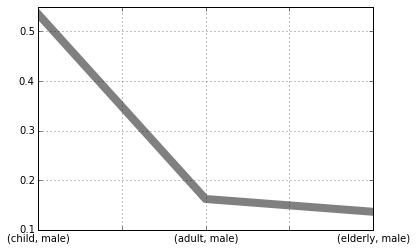

In [151]:
# group males by age, then plot survival rates

boys = dfSexAge.index[1]
men = dfSexAge.index[3]
oldmen = dfSexAge.index[5]

print('\nMale survival rates drop dramatically between age groups:')
male_groups = pd.DataFrame([dfSexAge.loc[boys], dfSexAge.loc[men], dfSexAge.loc[oldmen]])
# plot
male_groups.plot(grid=True, color='0.5', linewidth=8, legend=False)
show()

__*Observations:*__

Girls' survival rate was only about 1% higher than that of all females. <br>
Boys' survival rate was *substantially* higher than that of other males (0.643 to 0.189). In fact, boys were there only male group with more than a 0.5 survival rate, as far as I could discover.<p>
Adults of both sexes had about the same survival rate as that of all passengers.<br>
Elderly men survived at a rate below that of boys, adult males, and males overall. Elderly women (over age 59) all survived, but there were only 4 of them.<br>

Among **children**, the _**male survival rate was not much lower than the female rate**_. This suggests that Age could in some circumstances be as strong a factor in survival as was Sex.

Among adults and elders the survival discrepancy by Sex was more obvious (however, this statement isn't definitive for the elderly because there just weren't that many of them in this passenger sample).

### Sex and Pclass

In [152]:
# Apply survival function to the two columns
# (switch the hierarchical index for each, to look at it both ways)

print('Survival by Pclass, by Sex:')
print(survival_group(df, ['Sex', 'Pclass']))

print('\nSurvival by Sex within each Pclass:')
dfPclassSex = survival_group(df, ['Pclass', 'Sex'])
dfPclassSex

Survival by Pclass, by Sex:
Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

Survival by Sex within each Pclass:


Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

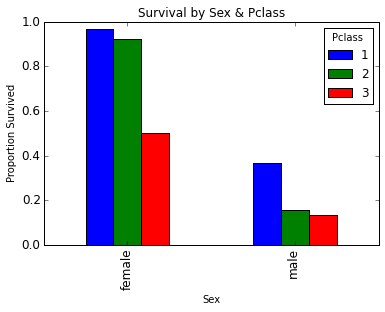

In [153]:
# Plot survival by Pclass and Sex

# suppress FutureWarning from output
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

# data
dfSP = survival_group(df, ['Sex','Pclass']).unstack()
# plot
dfSP.plot(kind='bar', fontsize=12, title='Survival by Sex & Pclass').set_ylabel('Proportion Survived')
show()

# Reviewer: thanks for the tip!

__*Tentative conclusions: Sex and Pclass*__


Nearly *all* 1st and 2nd Class females survived, but only half of the 3rd Class females survived. The proportion of 1st Class males who survived is nearly *twice* that of all males of all classes. Few 2nd and 3rd Class males survived. Therefore, we could divide each sex's likelihood of survival into two groups by passenger class -- but the composition of those groups is different for females and males:<br>
-- The most likely females to survive were in _1st and 2nd_ Class.<br>
-- The least likely male survivors were in _2nd and 3rd_ Class.<p>

The survival rate difference between females and males is starkest within the 2nd Class group. That is to say, among 2nd Class passengers, _Sex_ was more noticeably tied to survival rates than Pclass was. In contrast, among the 1st and 3rd Class passengers _Pclass_ was more connected to survival rates than Sex was.

### Age and Pclass

In [154]:
# Calculate survival rates of each age group by Pclass

print('\nClass survival by Age Group\n')

print('CHILDREN')
print(survival_group(df[df.Age_Group=='child'], 'Pclass'), '\n')

print('ADULTS')
print(survival_group(df[df.Age_Group=='adult'], 'Pclass'), '\n')

print('ELDERLY')
print(survival_group(df[df.Age_Group=='elderly'], 'Pclass'), '\n')


Class survival by Age Group

CHILDREN
Pclass
1    0.800000
2    1.000000
3    0.441176
Name: Survived, dtype: float64 

ADULTS
Pclass
1    0.654639
2    0.416149
3    0.210526
Name: Survived, dtype: float64 

ELDERLY
Pclass
1    0.294118
2    0.250000
3    0.200000
Name: Survived, dtype: float64 



_Observations:_

At first glance it's surprising that only two-thirds of the 1st class children survived while *all* of the 2nd Class children survived. But this is misleading due to sample size -- only 3 of the passengers in my "child" Age Group were 1st Class while 15 were 2nd Class.

Pclass
1     5
2    19
3    68
Name: PassengerId, dtype: int64


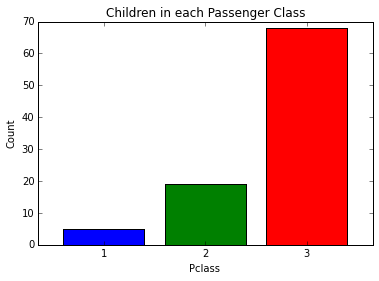

In [155]:
# How many children are there in each Pclass?
child_classes = df[df.Age_Group=='child'].groupby('Pclass')['PassengerId'].count()
print(child_classes)

# Plot it
child_classes.plot(kind='bar', title='Children in each Passenger Class', \
                   color=['b','g','r'], width=0.8, rot=True).set_ylabel('Count')
show()

_Far more children were travelling 3rd Class than in 1st or 2nd Class._<p>

__*Tentative conclusions: Age and Pclass*__

The proportion of children that survived was above the overall survival rate for all three Pclasses. In general, being a child was a stronger factor in survival than the Pclass was.

The proportion of 1st Class adults who survived (.655) is less than the proportion of 1st Class children who survived (.800), but it's not a big difference. However, in the 2nd and 3rd Classes, adult (and elderly) survival rates were _substantially_ less than the survival rate of children in those two classes.

Adults in 1st class survived at a much higher rate than the overall survival of 0.384. Adults in 2nd Class survived at just a slightly higher rate than the overall rate. Adults in 3rd Class survived at a lower rate than the overall survival rate -- about the same survival rate as the elderly of all classes.

Elderly passengers had a low rate of survival regardless of Pclass.

****

## All three Factors: Age, Sex, and Pclass

In [156]:
# Pare down the data we're looking at
data = df[['Survived', 'Sex', 'Pclass', 'Age_Group']]

# Call survival group function on data; make it a DataFrame
factors = pd.DataFrame(survival_group(data, ['Sex', 'Age_Group', 'Pclass']))

# View the DataFrame: survival proportion by Sex, Age Group, and Pclass
factors

Survived
Sex    Age_Group Pclass          
female child     1       0.500000
                 2       1.000000
                 3       0.513514
       adult     1       0.977528
                 2       0.909091
                 3       0.490566
       elderly   1       1.000000
                 3       1.000000
male   child     1       1.000000
                 2       1.000000
                 3       0.354839
       adult     1       0.380952
                 2       0.073684
                 3       0.115385
       elderly   1       0.142857
                 2       0.250000
                 3       0.000000

__*Observations:*__

The are quite a few survival rate numbers here when you break it down by three factors, and those __0.0__'s and __1.0__'s stand out like a sore thumb. 

It might have something to do with the low counts of passengers fitting certain criteria. Let's see...

In [157]:
# Count sex per age group and pclass
s_by_ap = pd.DataFrame(df.groupby(['Age_Group', 'Pclass'])['Sex'].value_counts(sort=False))

# Change name of column of value counts (label was "0"); then view
s_by_ap.rename_axis({0: 'On Board'}, axis=1)

On Board
Age_Group Pclass Sex             
child     1      female         2
                 male           3
          2      female        10
                 male           9
          3      female        37
                 male          31
adult     1      female        89
                 male         105
          2      female        66
                 male          95
          3      female       106
                 male         312
elderly   1      female         3
                 male          14
          2      male           4
          3      female         1
                 male           4

The 0.0's and 1.0's were due to there being few 1st and 2nd Class children aboard, and to the small size of my 'child' and (especially) my 'elder' age groups.

****

__*More observations regarding likelihood of survival:*__

Combining all three factors into one likelihood-of-survival DataFrame just serves to reinforce the observations I've made already. Females were more likely to survive than males. Children were more likely to survive than adults and the elderly. 1st Class passengers were more likely to survive than 2nd or 3rd Class passengers (though 2nd Class passengers did have a better-than-average survival rate).

**Here are a couple of new observations that stood out:**<br>

All females had a higher likelihood of survival than the overall likelihood of 0.384. Even 3rd Class adult females (0.459 survival) had better than the overall survival rate.<br>
The only males whose likelihood of surviving beat 0.384 were men in 1st Class (barely), and all boys under age 14.


****

## Summary of Tentative Conclusions

_**Limits of this data analysis:**  
Only three independent variables were explored as factors. Other factors could have been explored in a lengthier, more complex analysis. For example, I could have explored the likelihood of survival based on whether a passenger was traveling alone or with family by wrangling all the combinations of values in the "SibSp" (sibling-spouse) and "Parch" (parent-child) data. Likewise, I could've looked at survival rates by point of Embarkation._  

_It should be noted that the data in this project represents only a sample of passengers from the total number who were aboard the Titanic. The titanic data here contains records for 891 of the passengers. There were over 2000 passengers and crew aboard the ship when she sailed._

__Conclusions:__

Overall, I think I was observing the *"women and children first"* norm in action in this sample -- with a *passenger class* twist.

The passenger class "twist", for one example, showed up in how all of the 1st and 2nd Class boys survived but fewer than half of the 3rd Class boys survived, in which case Pclass seemed like more of a survival factor than age was. I say "seemed like" because there may have been other dynamics in play, such as families (or a mother and her child) deciding to remain together rather than be split apart as the lifeboats were being filled, and therefore all surviving or all perishing together.

__*Overall, based on the three factors examined:*__

__Sex__ appears to be the strongest factor in the likelihood of survival.

__Age__ came close to being as strong a factor as Sex *at very __young__ ages* only.

Compared to the other two factors, __Passenger Class__ by itself did not have as strong an effect on survival rates -- but it *could alter* the effect the other two factors had on the likelihood of survival.

Therefore, with qualifications, I would stick with a general statement that the combination of factors which made people more likely to survive the sinking of the Titanic could be summarized as "women and children first".

****  

## References, Sources, Inspiration and Hat Tips

#### *As I worked on this project, the following sources provided me with guidance, tips, how-to's, and inspiration.*



**Udacity** course: "Introduction to Data Analysis", especially *Lesson 3*  
http://matplotlib.org/api/pyplot_api.html#pyplot  
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html   
http://pandas.pydata.org/pandas-docs/version/0.17.0/visualization.html   
http://nbviewer.jupyter.org/github/rasbt/matplotlib-gallery/blob/master/ipynb/barplots.ipynb#Bar-plot-with-plot-labels/text-2  
https://github.com/fonnesbeck/statistical-analysis-python-tutorial (esp. Lesson 3, "Plotting and Visualization")  
https://www.kaggle.com/c/titanic/forums/t/6130/genderclassmodel-pandas-py (hat tip: Dov Grobgeld)  
https://github.com/agconti/kaggle-titanic (hat tip: AstroDave)  
http://chrisalbon.com/python/matplotlib_bar_plot.html  
http://chrisalbon.com/python/matplotlib_pie_chart.html  
http://chrisalbon.com/python/pandas_binning_data.html  
http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/  
http://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning